 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path= Path('Resources/whale_returns.csv')
whale_csv=pd.read_csv(whale_path,parse_dates=True, index_col='Date',infer_datetime_format=True)
whale_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_csv.dropna().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path= Path('Resources/algo_returns.csv')
algo_csv=pd.read_csv(algo_path,parse_dates=True, index_col='Date',infer_datetime_format=True)
algo_csv.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_csv.dropna().head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path= Path('Resources/sp500_history.csv')
sp500_csv=pd.read_csv(sp500_path,parse_dates=True, index_col='Date',infer_datetime_format=True)
sp500_csv.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_csv.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_csv["Close"]= sp500_csv["Close"].str.replace('$','',regex=True)
sp500_csv["Close"]= sp500_csv["Close"].str.replace(',','',regex=True)
sp500_csv["Close"]= sp500_csv["Close"].astype("float")
sp500_csv.sort_index(inplace = True)
sp500_csv

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [11]:
sp500_csv.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns
sp500_daily_returns = sp500_csv.pct_change()
print(sp500_daily_returns)

               Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1649 rows x 1 columns]


In [13]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
print(sp500_daily_returns)

               Close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457
...              ...
2019-04-16  0.000509
2019-04-17 -0.002274
2019-04-18  0.001579
2019-04-22  0.001012
2019-04-23  0.008841

[1648 rows x 1 columns]


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {"Close":"SP500 Close amounts"}, inplace = True)
print(sp500_daily_returns)

            SP500 Close amounts
Date                           
2012-10-02             0.000872
2012-10-03             0.003624
2012-10-04             0.007174
2012-10-05            -0.000322
2012-10-08            -0.003457
...                         ...
2019-04-16             0.000509
2019-04-17            -0.002274
2019-04-18             0.001579
2019-04-22             0.001012
2019-04-23             0.008841

[1648 rows x 1 columns]


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_dailyreturns = pd.concat([whale_csv, algo_csv,sp500_daily_returns], axis = "columns",join = "inner")
combined_dailyreturns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close amounts
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

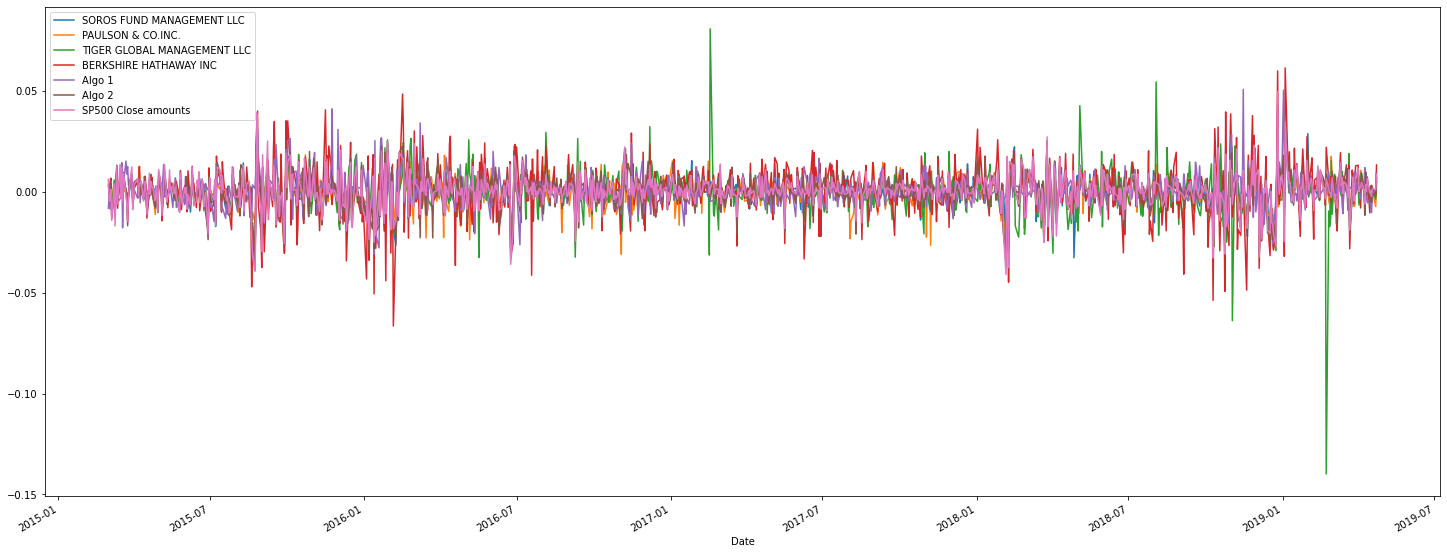

In [16]:
# Plot daily returns of all portfolios
combined_dailyreturns.plot(figsize=(25,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Daily Returns'}, xlabel='Date'>

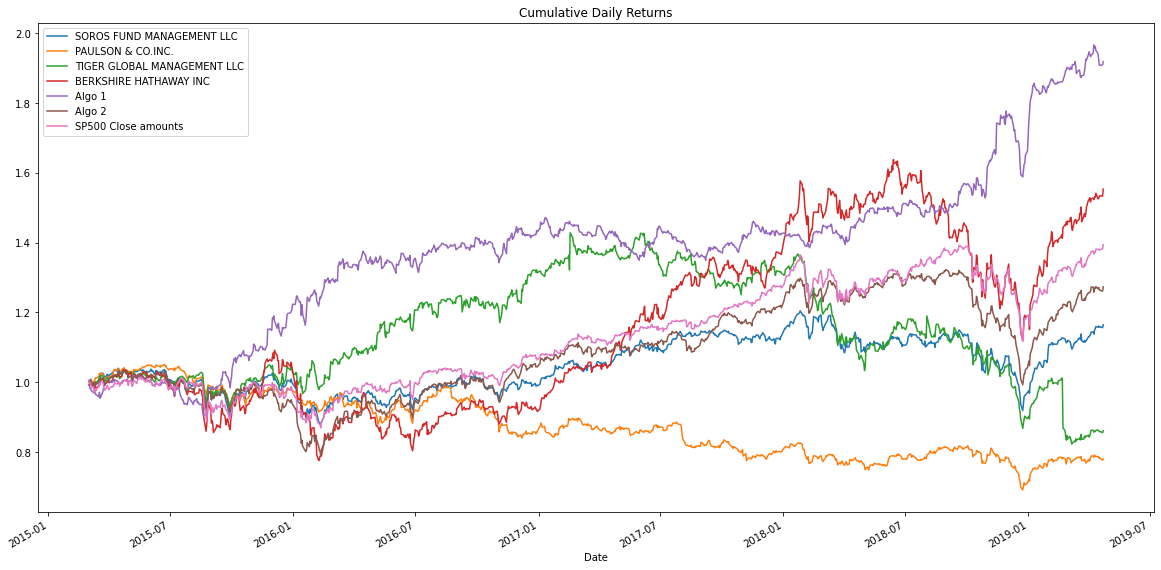

In [17]:
# Calculate cumulative returns of all portfolios
df_cumulative = (1+ combined_dailyreturns).cumprod()
df_cumulative.plot(figsize = (20,10),title=("Cumulative Daily Returns"))
# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

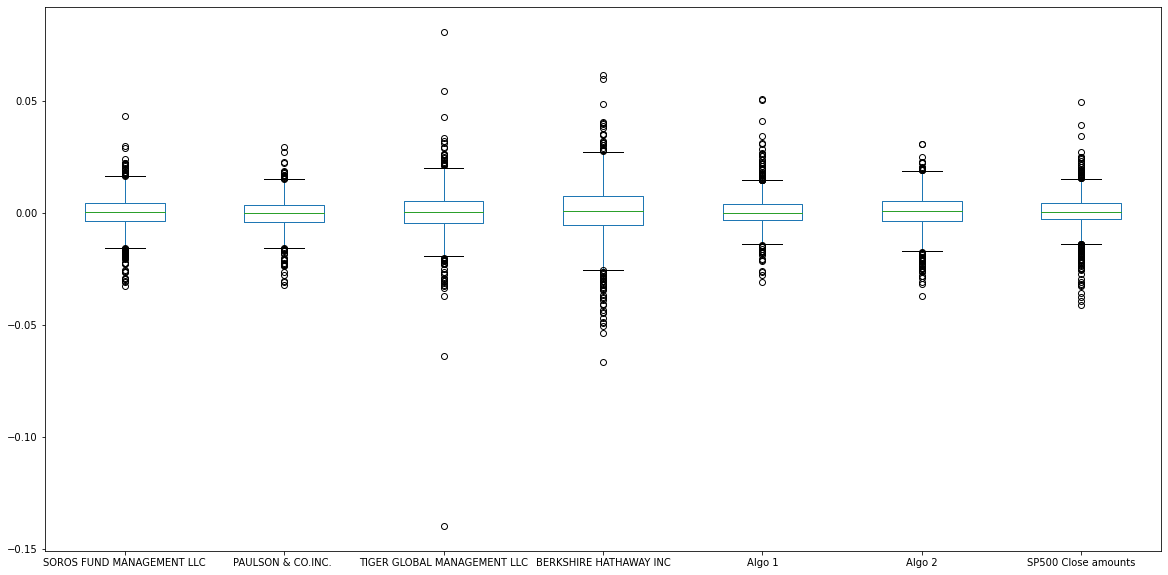

In [18]:
# Box plot to visually show risk
combined_dailyreturns.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
df_cumulative = pd.DataFrame(df_cumulative.std()).rename(columns = {0:"std"})
df_cumulative

,std
SOROS FUND MANAGEMENT LLC,0.073238
PAULSON & CO.INC.,0.088455
TIGER GLOBAL MANAGEMENT LLC,0.149844
BERKSHIRE HATHAWAY INC,0.241575
Algo 1,0.230581
Algo 2,0.132086
SP500 Close amounts,0.145314


### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
sp500_std=sp500_daily_returns.std()
# Determine which portfolios are riskier than the S&P 500
riskier_std = df_cumulative[df_cumulative["std"] > df_cumulative.loc["SP500 Close amounts", "std"]]
riskier_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.149844
BERKSHIRE HATHAWAY INC,0.241575
Algo 1,0.230581


### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = df_cumulative*np.sqrt(252)
annualized_std

,std
SOROS FUND MANAGEMENT LLC,1.162620
PAULSON & CO.INC.,1.404180
TIGER GLOBAL MANAGEMENT LLC,2.378706
BERKSHIRE HATHAWAY INC,3.834878
Algo 1,3.660363
Algo 2,2.096800
SP500 Close amounts,2.306783


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

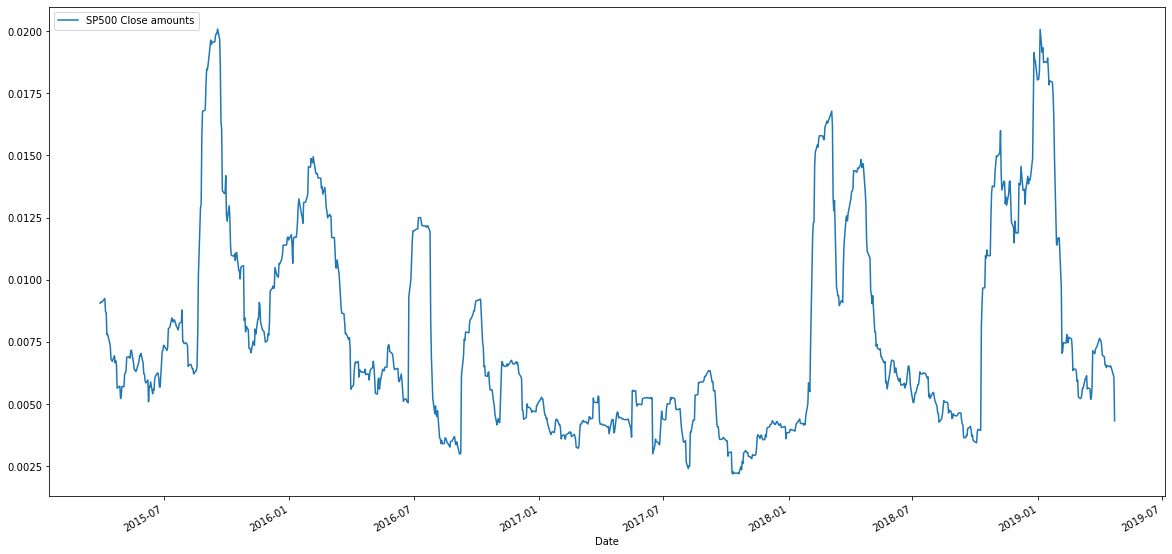

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp500_rolling_21 = combined_dailyreturns[["SP500 Close amounts"]].rolling(window = 21).std()

# Plot the rolling standard deviation
sp500_rolling_21.plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:xlabel='SP500 Close amounts', ylabel='Algo 2'>

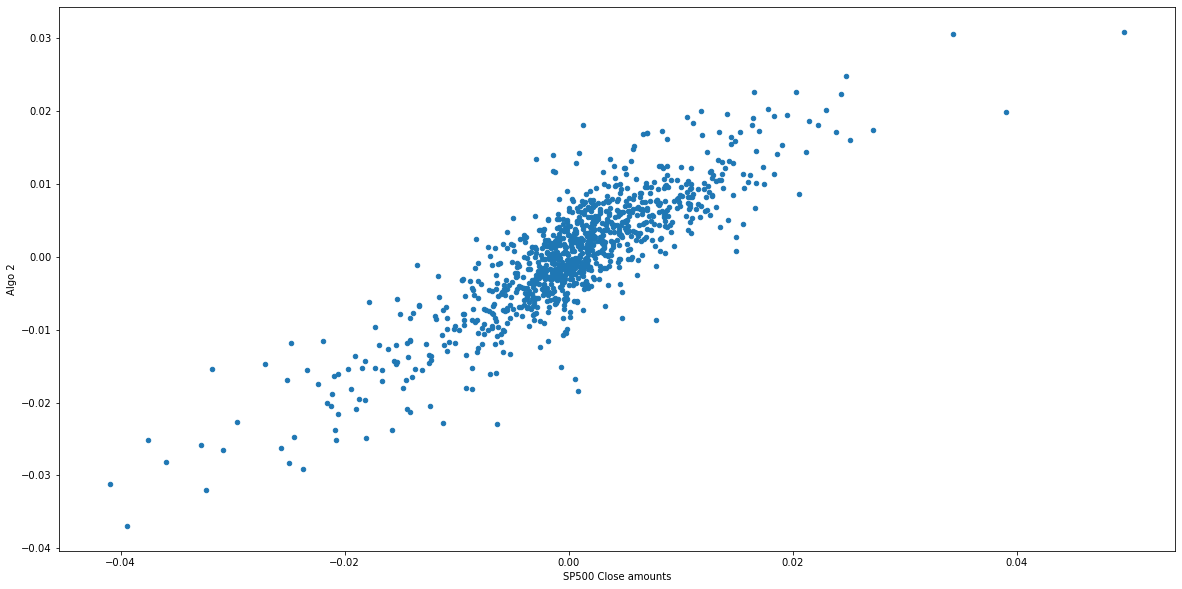

In [23]:
# Calculate the correlation
correlation_sp500 = pd.DataFrame(combined_dailyreturns.corr()).loc[:,"SP500 Close amounts"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]
# Display de correlation matrix
combined_dailyreturns.plot(kind="scatter", y = "Algo 2", x = "SP500 Close amounts", figsize = (20,10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BH'}, xlabel='Date'>

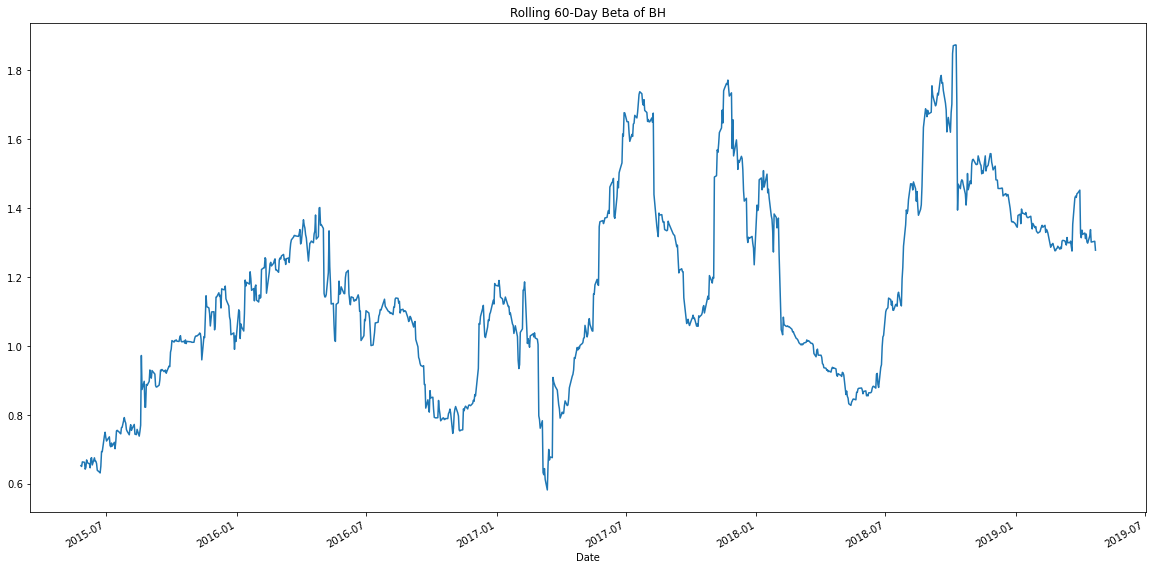

In [24]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_dailyreturns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_dailyreturns['SP500 Close amounts'])
# Calculate variance of S&P 500
rolling_variance = combined_dailyreturns['SP500 Close amounts'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BH')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [25]:
# Use `ewm` to calculate the rolling window
df_daily_ewm = combined_dailyreturns.ewm(span = 21,adjust = False).mean()
print(df_daily_ewm)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                  -0.000948           -0.004233   
2015-03-05                  -0.000496           -0.003478   
2015-03-06                  -0.001170           -0.003486   
...                               ...                 ...   
2019-04-16                   0.002021            0.000516   
2019-04-17                   0.001574           -0.000119   
2019-04-18                   0.001563            0.000003   
2019-04-22                   0.001185           -0.000664   
2019-04-23                   0.001729           -0.000287   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-02                          NaN             

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_dailyreturns.mean()*252/(combined_dailyreturns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.360829
Algo 2                         0.506929
SP500 Close amounts            0.658706
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

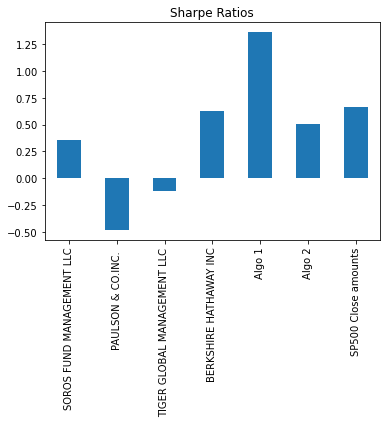

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
google_path= Path('Resources/goog_historical.csv')
google_csv=pd.read_csv(google_path,parse_dates=True, index_col='Trade DATE',infer_datetime_format=True)
google_csv.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [29]:
google_csv.isnull().dropna()

,Symbol,NOCP
Trade DATE,,
2019-05-09,False,False
2019-05-08,False,False
2019-05-07,False,False
2019-05-06,False,False
2019-05-03,False,False
...,...,...
2018-05-17,False,False
2018-05-16,False,False
2018-05-15,False,False


In [30]:
# Reading data from 2nd stock
apple_path= Path('Resources/aapl_historical.csv')
apple_csv=pd.read_csv(apple_path,parse_dates=True, index_col='Trade DATE',infer_datetime_format=True)

apple_csv.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [31]:
apple_csv.isnull().dropna()

,Symbol,NOCP
Trade DATE,,
2019-05-09,False,False
2019-05-08,False,False
2019-05-07,False,False
2019-05-06,False,False
2019-05-03,False,False
...,...,...
2018-05-17,False,False
2018-05-16,False,False
2018-05-15,False,False


In [32]:
# Reading data from 3rd stock
costco_path= Path('Resources/cost_historical.csv')
costco_csv=pd.read_csv(costco_path,parse_dates=True, index_col='Trade DATE',infer_datetime_format=True)
costco_csv.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [33]:
costco_csv.isnull().dropna()

,Symbol,NOCP
Trade DATE,,
2019-05-09,False,False
2019-05-08,False,False
2019-05-07,False,False
2019-05-06,False,False
2019-05-03,False,False
...,...,...
2018-05-17,False,False
2018-05-16,False,False
2018-05-15,False,False


In [34]:
# Combine all stocks in a single DataFrame
combined_custom_stocks = pd.concat([google_csv,apple_csv,costco_csv], axis="rows", join="inner")
combined_custom_stocks = combined_custom_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
combined_custom_stocks.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [35]:
# Reset Date index
combined_custom_stocks.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
combined_custom_stocks.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [36]:
combined_custom_stocks.dtypes

Symbol
AAPL    float64
COST    float64
GOOG    float64
dtype: object

In [37]:
# Calculate daily returns
combined_daily_returns=combined_custom_stocks.pct_change()
# Drop NAs
combined_daily_returns.isnull().dropna(inplace=True)
# Display sample data
combined_daily_returns

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio = combined_custom_stocks.dot(weights)
my_portfolio_returns = my_portfolio.pct_change()
my_portfolio_returns.dropna(inplace = True)

# Display sample data
my_portfolio_returns.head()

Trade DATE
2018-05-14    0.001093
2018-05-15   -0.015550
2018-05-16    0.005140
2018-05-17   -0.002370
2018-05-18   -0.009248
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat((my_portfolio_returns,combined_dailyreturns), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"my_portfolio"}, inplace = True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close amounts
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.006376,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close amounts
2018-05-14,0.001093,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.015550,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.005140,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.002370,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.009248,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.003036,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.007962,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.000599,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.006376,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`
portfolio_std = pd.DataFrame(portfolio_returns.std()).rename(columns = {0:"std"})
portfolio_std

,std
my_portfolio,0.014413
SOROS FUND MANAGEMENT LLC,0.009240
PAULSON & CO.INC.,0.007353
TIGER GLOBAL MANAGEMENT LLC,0.014648
BERKSHIRE HATHAWAY INC,0.015569
Algo 1,0.008423
Algo 2,0.008791
SP500 Close amounts,0.009578


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

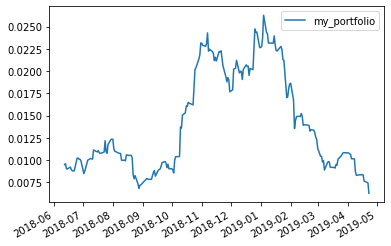

In [42]:
# Calculate rolling standard deviation
my_portfolio_rolling_21 = portfolio_returns[["my_portfolio"]].rolling(window = 21).std()
# Plot rolling standard deviation
my_portfolio_rolling_21.plot()

### Calculate and plot the correlation

<AxesSubplot:xlabel='Symbol', ylabel='Symbol'>

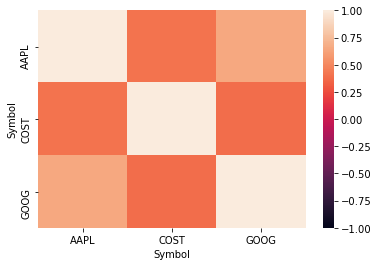

In [43]:
# Calculate and plot the correlation
price_correlation = combined_daily_returns.corr()
sns.heatmap(price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}>

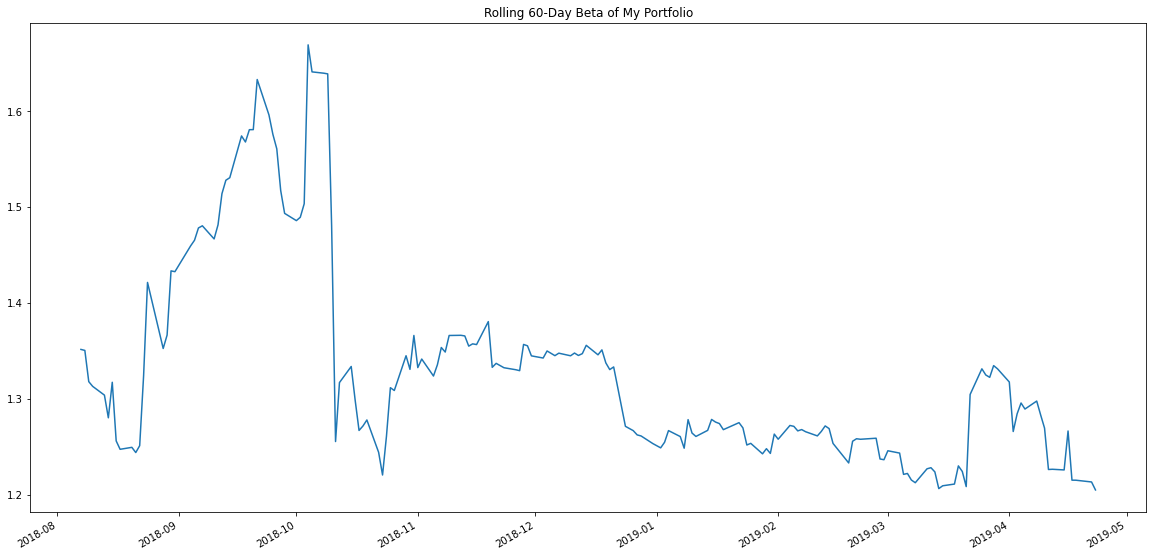

In [53]:
# Calculate and plot Beta
covariance = portfolio_returns['my_portfolio'].cov(portfolio_returns['SP500 Close amounts'])
variance=portfolio_returns['my_portfolio'].var()
beta = covariance / variance
rolling_covariance = portfolio_returns['my_portfolio'].rolling(window=60).cov(portfolio_returns['SP500 Close amounts'])
rolling_variance = portfolio_returns['SP500 Close amounts'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Calculate Annualzied Sharpe Ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

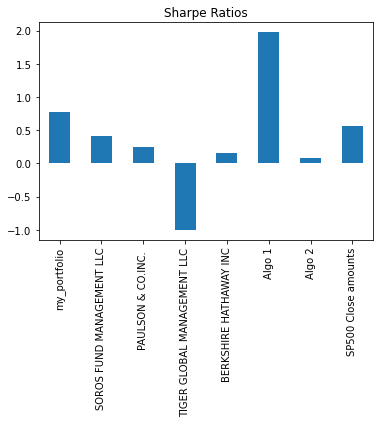

In [55]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
#My portfolio is highly correlated to Tiger Global Management. 